# Centrality

The idea of “centrality” can be a bit philosophical when it comes to graphs. Are central nodes well-connected nodes? Are they the nodes through which the shortest paths pass? Are they the nodes with the lowest eccentricity, like in the previous section? The answer really depends on what you care about, which is why there are a few ways of calculating centrality within a graph.

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

Create a sample graph.

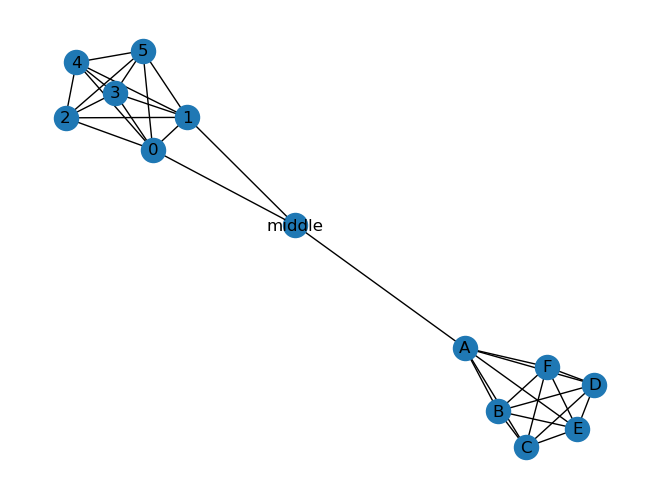

In [8]:
graph1 = nx.complete_graph(6)
graph2 = nx.complete_graph(6)
graph2 = nx.relabel_nodes(graph2, {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F'})
connection = nx.from_edgelist([(0, 'middle'), (1, 'middle'), ('middle', 'A')])
graph = nx.compose_all([graph1, graph2, connection])
nx.draw_spring(graph, with_labels=True)

Here, I’m calculating a few different approaches:

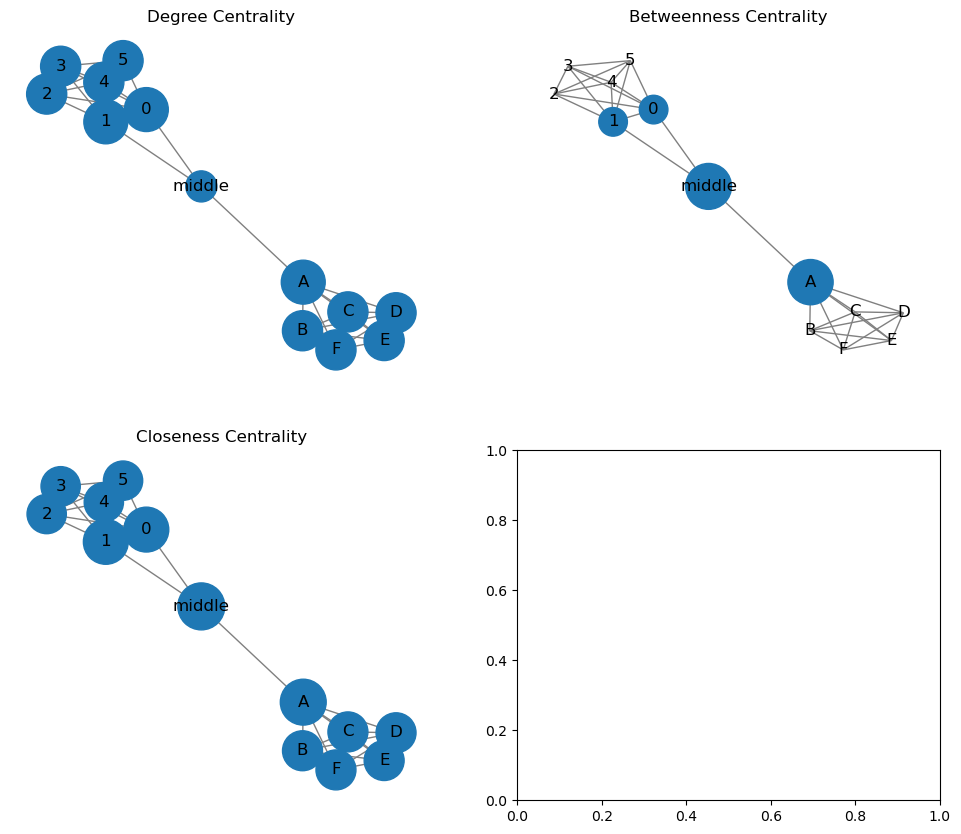

In [12]:
degree_centrality = nx.degree_centrality(graph)
betweenness_centrality = nx.betweenness_centrality(graph)
closeness_centrality = nx.closeness_centrality(graph)
#eigenvector_centrality = nx.eigenvector_centrality(graph)

# Plot Centrality Measures
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
centralities = {
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality,
    #'Eigenvector Centrality': eigenvector_centrality
}

pos = nx.spring_layout(graph, seed=42)

for ax, (title, centrality) in zip(axs.flatten(), centralities.items()):
    node_sizes = [v * 2000 for v in centrality.values()]
    nx.draw(graph, pos, with_labels=True, node_size=node_sizes, edge_color='gray', ax=ax)
    ax.set_title(title)

plt.show()

Here,

- Degree Centrality is judging centrality by how many connections a node has. By this definition, the node labeled “middle” is the least central, as it has the fewest number of connections.
- Betweenness Centrality is judging centrality by how many shortest paths go through a node. Here, many shortest paths go through the node labeled “middle”, so it scores high on this metric of centrality.
- Closeness Centrality is judging based on the average distance to all other nodes. It seems like, by this metric, the node labeled “middle” might be marginally more central, but not much.
- Eigenvector Centrality is a bit complex mathematically, but the essential idea is that it accounts for how impactful the neighbors of a particular node are. So, a node may be deemed “central” based on how important neighboring nodes are, even if it would rank low on all other metrics of centrality.

# Cliques

The word “Clique” is used in both American and British English to describe a tight, exclusive group of friends within a larger network of friends. A “Clique” in graph theory is a complete sub-graph within a larger graph: a set of vertices that are **all friends with each other**.

Finding the largest such group is easy to state but computationally hard, making cliques a central object in both theoretical and applied graph analysis.


## Visual intuition  

```
Original graph

A──B──C
│\/│\ │
│/\│ \│
D──E──F

Largest clique highlighted:

A──B
│\/│
│/\│
D──E
```

Vertices {A, B, D, E} all connect pairwise → they form a 4-clique (K₄).

## Why cliques matter  

• Social networks “a group where everyone knows everyone.”  
• Biology protein complexes, gene co-expression clusters.  

------

We can find cliques with the following code:

[[0, 1, 2, 3, 4, 5], [0, 1, 'middle'], ['D', 'E', 'B', 'F', 'A', 'C'], ['A', 'middle']]


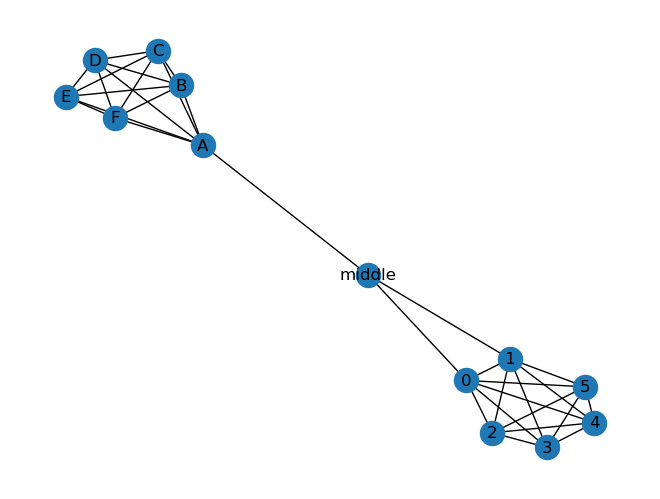

In [14]:
#find maximal complete subgraphs
print(list(nx.find_cliques(graph)))
nx.draw_spring(graph, with_labels=True)

We can filter by graphs of a certain size by using the k_core function, which finds all of the islands that are a fully connected graph of some size

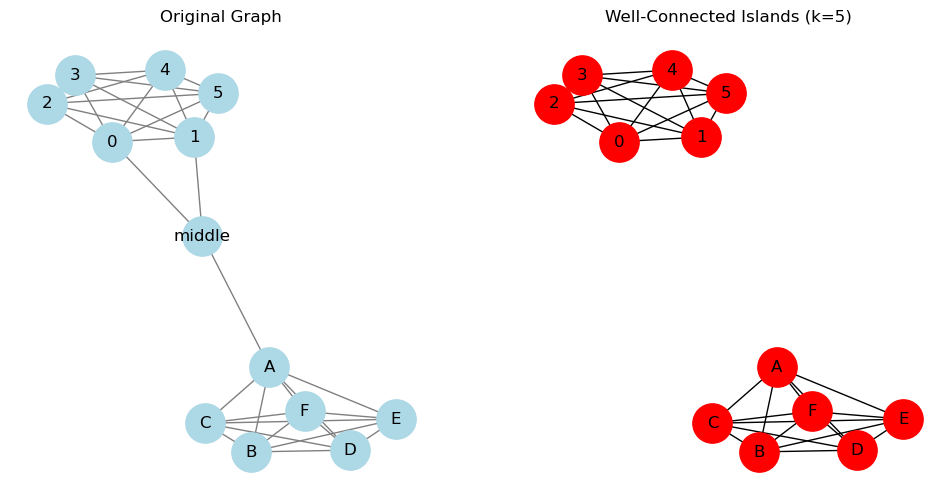

In [15]:
# Compute the k-core subgraph (nodes with degree >= 5)
well_connected_islands = nx.k_core(graph, k=5)

# Define positions for consistent layout
pos = nx.spring_layout(graph)

# Plot both graphs side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot original graph
axes[0].set_title("Original Graph")
nx.draw(graph, pos, ax=axes[0], with_labels=True, node_color="lightblue", edge_color="gray", node_size=800)

# Plot k-core subgraph
axes[1].set_title("Well-Connected Islands (k=5)")
nx.draw(well_connected_islands, pos, ax=axes[1], with_labels=True, node_color="red", edge_color="black", node_size=800)

# Show the plots
plt.show()

`nx.kcore` creates a graph called `well_connected_islands` based on preserving islands that are equivalent to a k5 fully connected graph or higher. `well_connected_islands` is perhaps a bit of a misnomer because it’s a single graph that contains all the islands. We could use `nx.connected_components` to identify the islands in this graph to actually list out the islands within the `well_connected_islands graph`.

[{0, 1, 2, 3, 4, 5}, {'E', 'D', 'B', 'F', 'A', 'C'}]


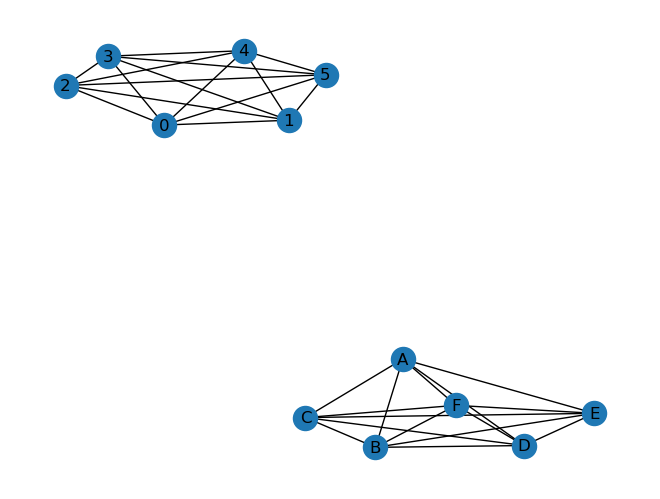

In [16]:
"""finding the islands in the well_connected_islands graph.
"""

nx.draw(well_connected_islands, pos, with_labels=True)
print(list(nx.connected_components(well_connected_islands)))

Cliques are a useful general idea because they allow one to isolate very tightly grouped regions within a larger graph. The following section defines a few more structures that can also be useful in understanding the structure of a graph.